# Lab7: Clustering

### Дабеска Мила 193263

&nbsp;

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('history-of-rock-spotify.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace = True)
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0


In [3]:
dataset = dataset[['release_date', 'popularity']].copy()

In [4]:
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset.head()

,release_date,popularity
name,,
Smells Like Teen Spirit,35,74
Stairway to Heaven - Remaster,15,78
Bohemian Rhapsody - Remastered 2011,19,74
Imagine - Remastered 2010,15,77
(I Can't Get No) Satisfaction - Mono Version,9,77


&nbsp;

## K-Means

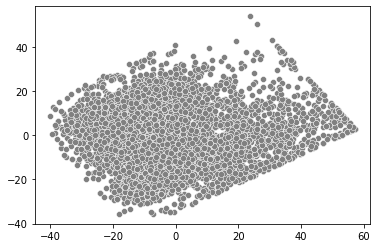

In [5]:
pca = PCA(n_components=2)
dataset_pca = pca.fit(dataset).transform(dataset)
sns.scatterplot(x=dataset_pca[:,0], y=dataset_pca[:,1], color='gray')
plt.show()

In [6]:
def k_means(data, n_clusters):
    k_means = KMeans(n_clusters=n_clusters, max_iter=50, random_state=1)
    k_means.fit(data)
    labels = k_means.labels_
    centroids = k_means.cluster_centers_
    pd.DataFrame(centroids)
    
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
    sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="*", color="g", s=500)
    plt.show()

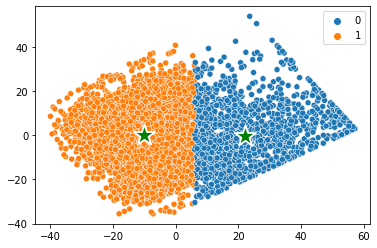

In [7]:
k_means(dataset_pca, 2)

Text(0, 0.5, 'SSE')

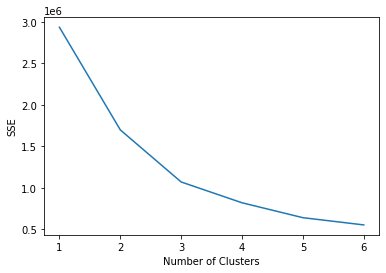

In [8]:
numClusters = 7
SSE = []
silhouette_coefficients = []
for k in range(1, numClusters):
    k_means = KMeans(n_clusters=k)
    k_means.fit(dataset)
    SSE.append(k_means.inertia_)
    if k<=1:
        continue
    score = silhouette_score(dataset, k_means.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(1, numClusters), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

&nbsp;

## Hierarchical (Agglomerative)

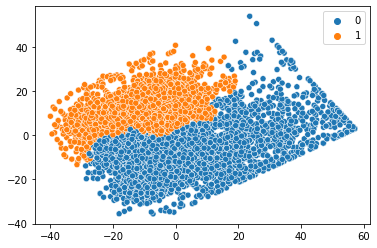

In [9]:
ac = AgglomerativeClustering(n_clusters=2).fit(dataset_pca)

sns.scatterplot(x=dataset_pca[:,0], y=dataset_pca[:,1], hue=ac.labels_)
plt.show()

In [10]:
print(ac.n_clusters_)
print(ac.n_connected_components_)

2
1


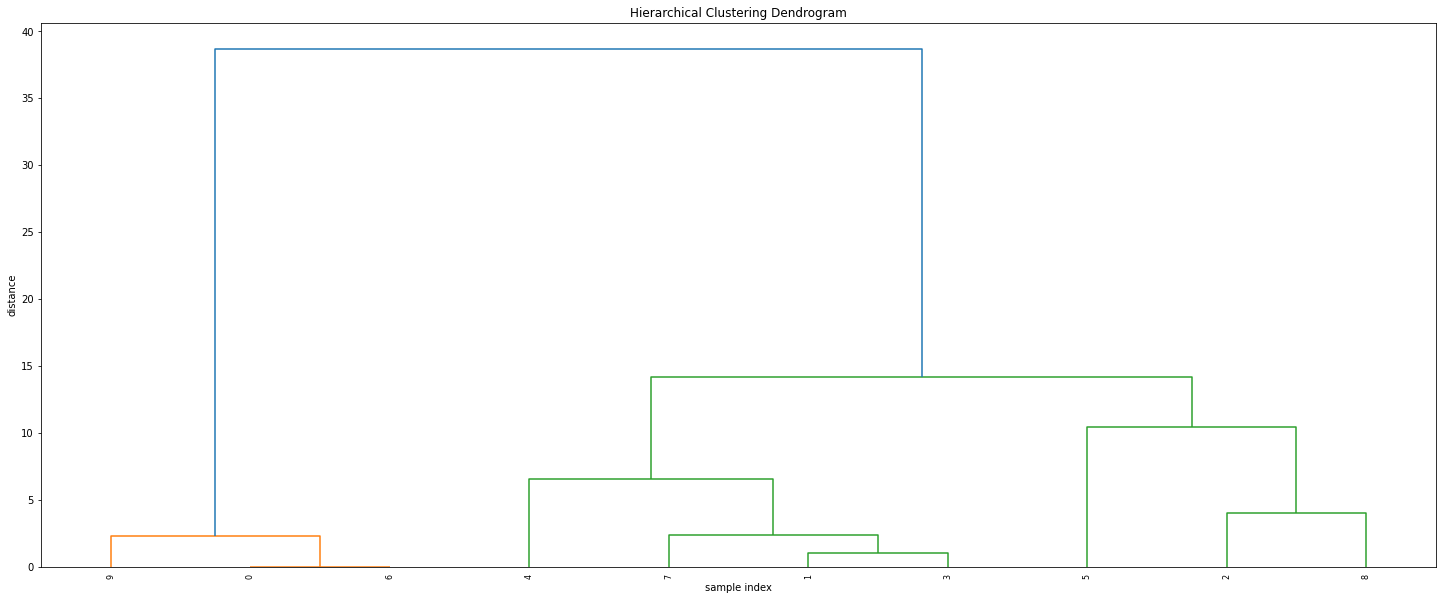

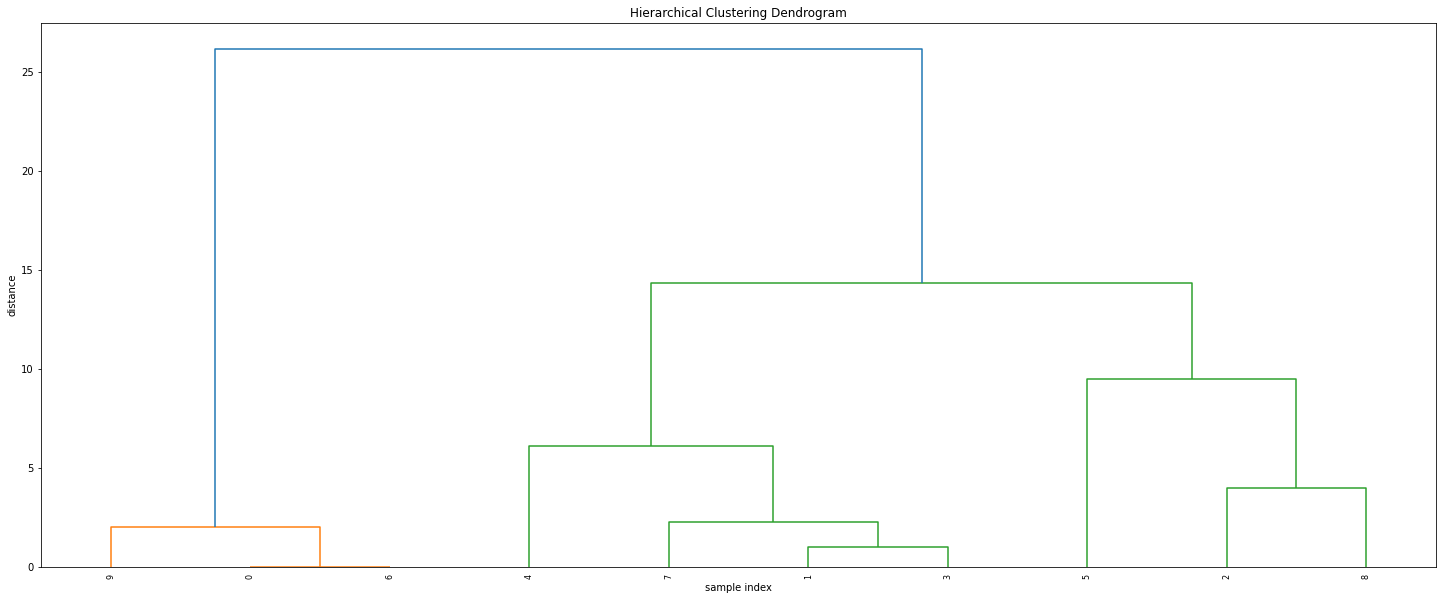

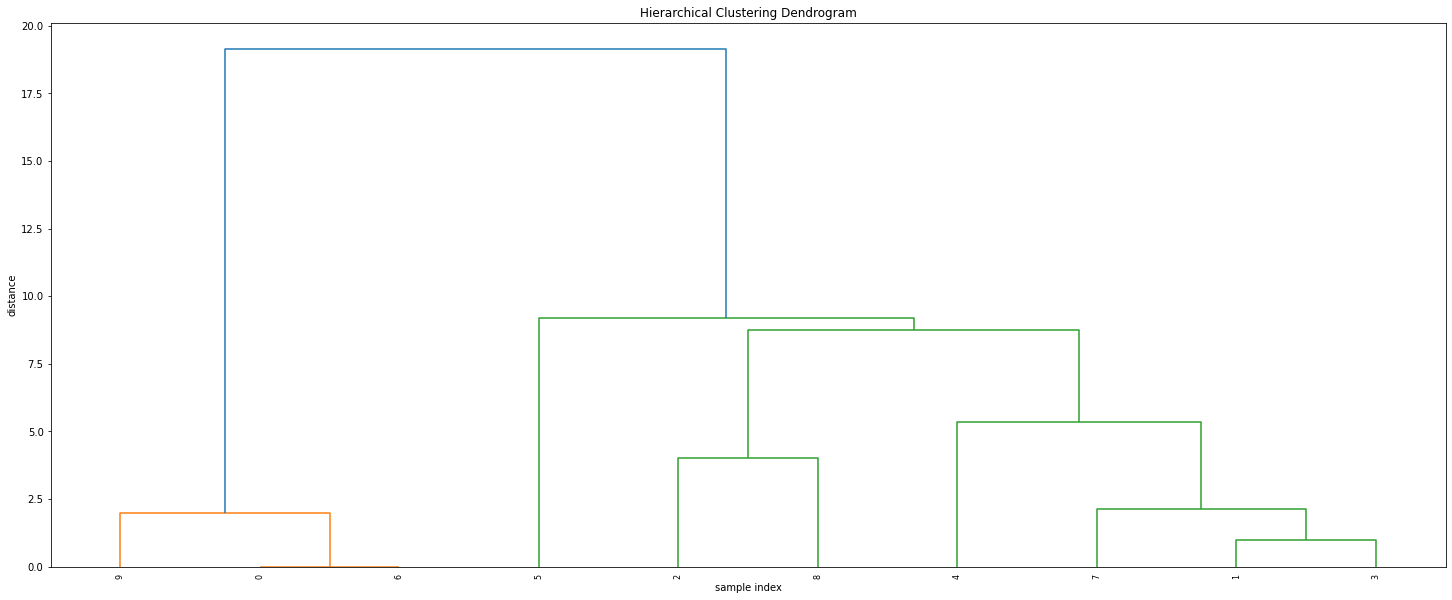

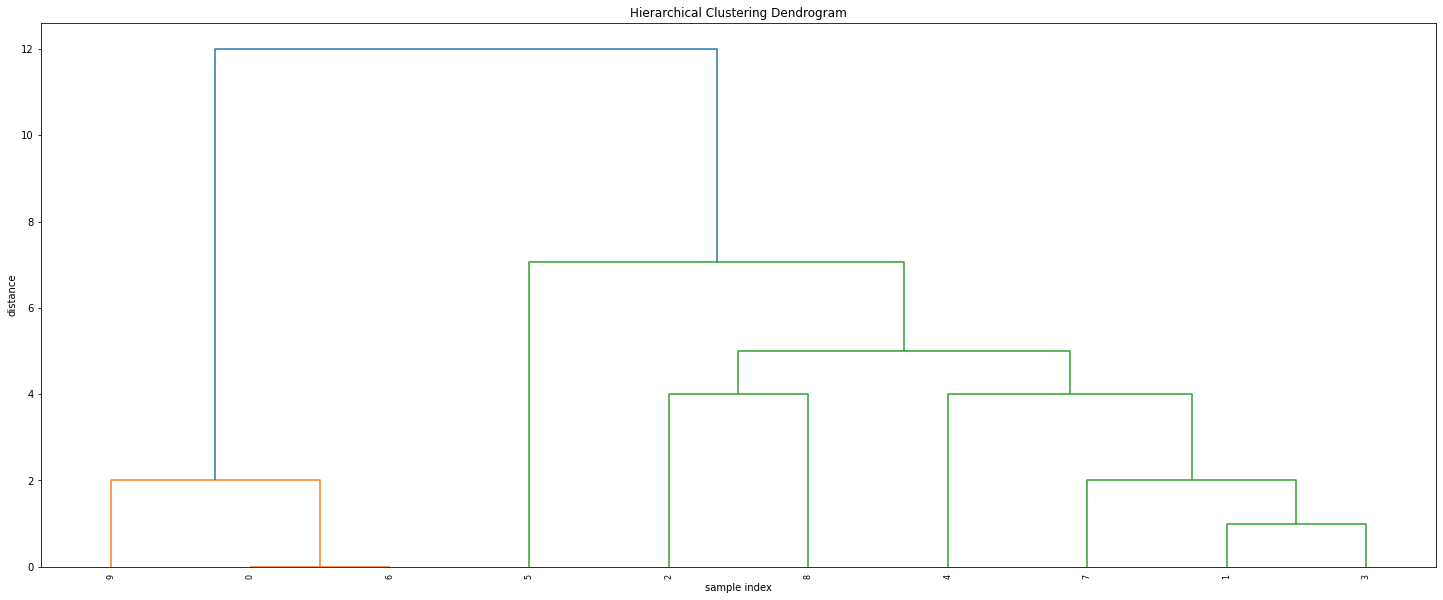

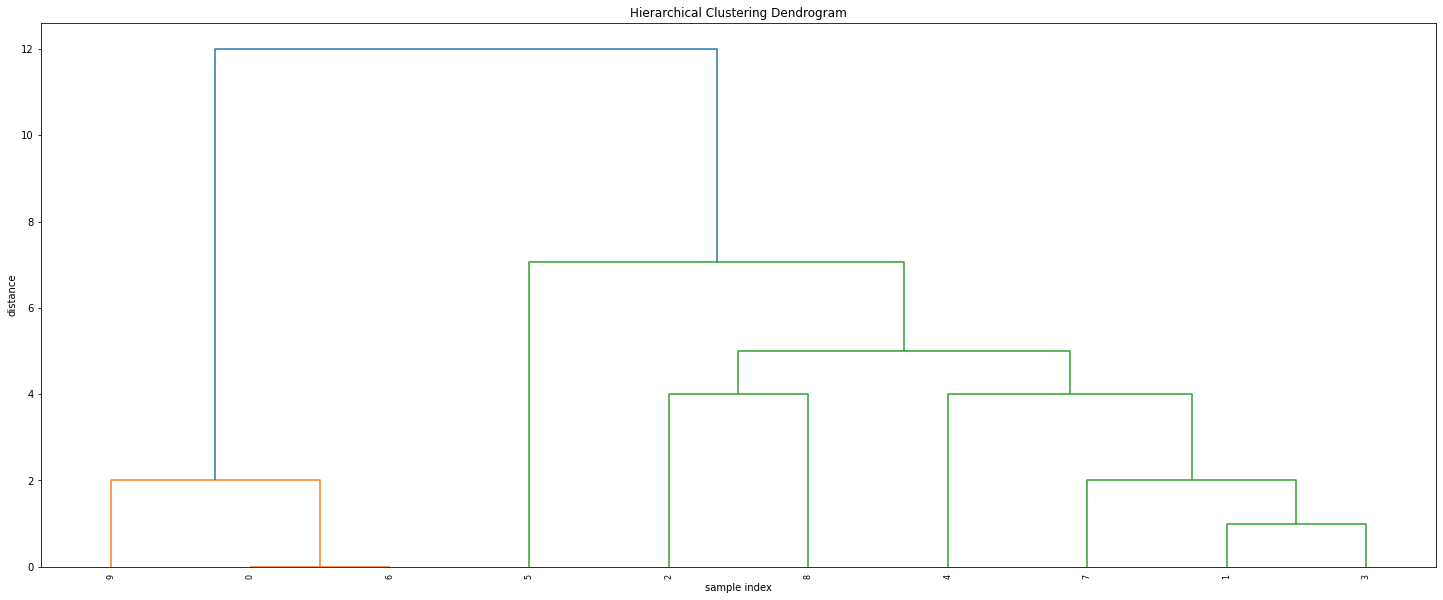

In [11]:
linkage_types = ['ward', 'complete', 'average', 'single']

for link_type in linkage_types:
    Z = linkage(dataset[:10], link_type)

    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')

    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.);
    plt.show();

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp');

&nbsp;

## DBSCAN

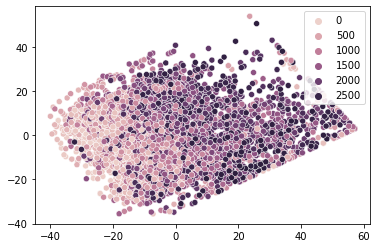

In [12]:
db = DBSCAN(eps=0.1, min_samples=1).fit(dataset_pca)
sns.scatterplot(x=dataset_pca[:,0], y=dataset_pca[:,1], hue=db.labels_)
plt.show()